In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.decomposition import *
from sklearn.manifold import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'] [0 1 2 3 4 5 6 7 8 9]
(1797, 64)


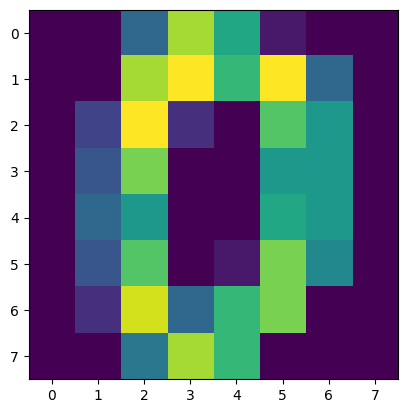

In [11]:
data=load_digits()
print(data.feature_names, data.target_names)
print(data.data.shape)
plt.imshow(data.images[0])

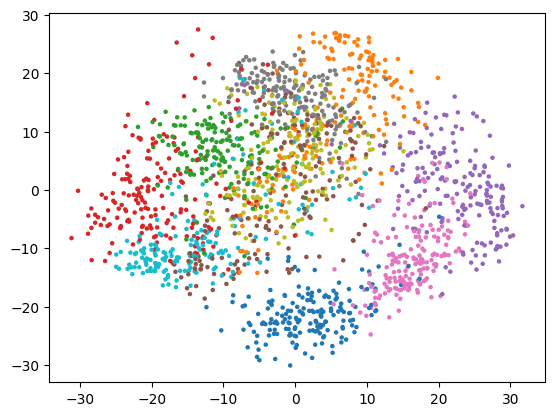

In [15]:
pca=PCA(2)
tr = pca.fit_transform(data.data)
plt.scatter(tr[:,0], tr[:,1], c=data.target,cmap="tab10", s=5)

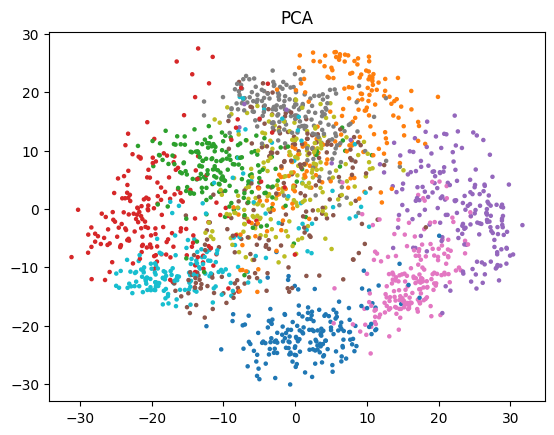

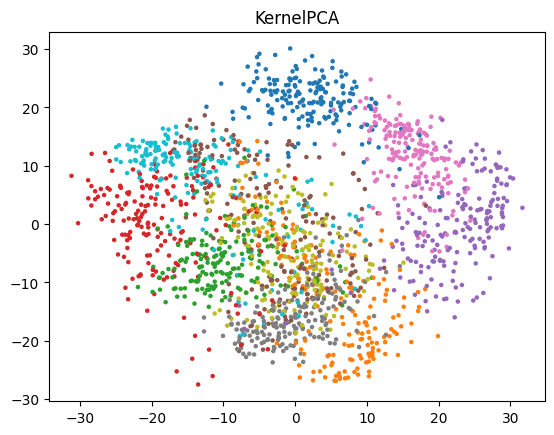

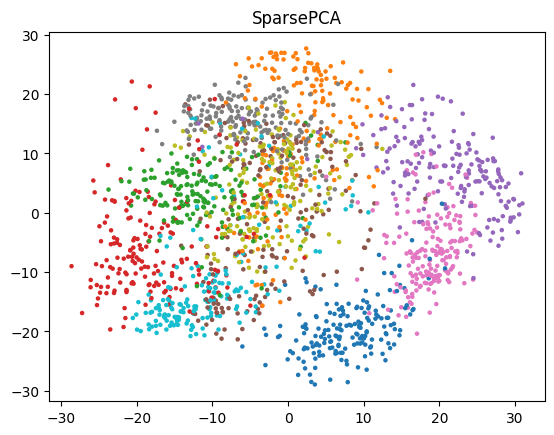

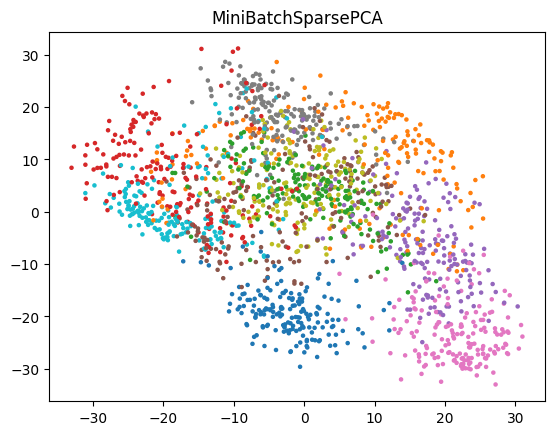

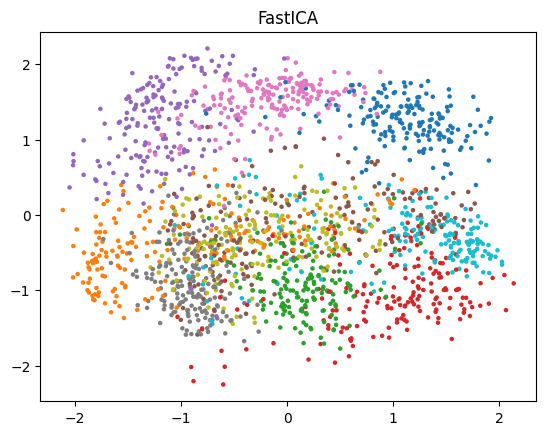

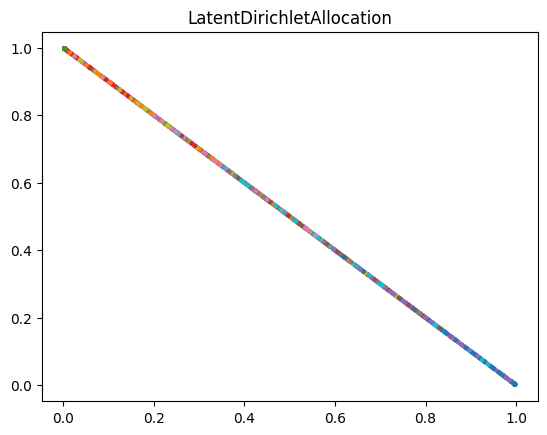

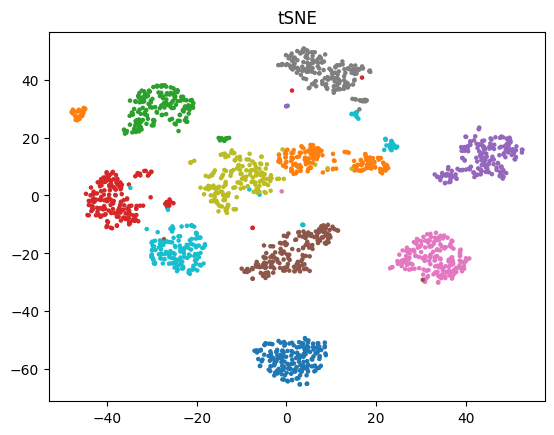

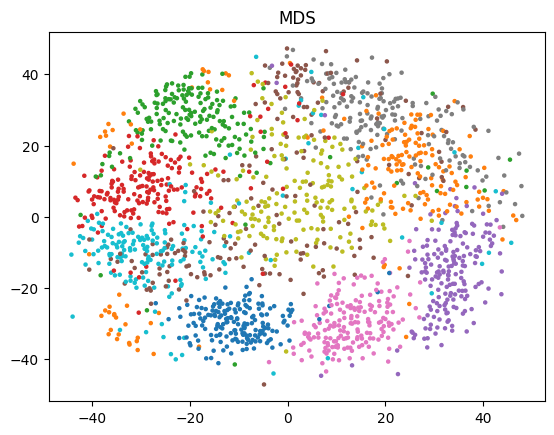

In [16]:
def viusalize_dim_red(name, alg, data):
    al=alg(2)
    tr = al.fit_transform(data.data)
    plt.scatter(tr[:,0], tr[:,1], c=data.target,cmap="tab10", s=5)
    plt.title(name)
    plt.show()

dim_red_algs={"PCA":PCA, "KernelPCA":KernelPCA, "SparsePCA":SparsePCA, "MiniBatchSparsePCA":MiniBatchSparsePCA,"FastICA":FastICA, "LatentDirichletAllocation":LatentDirichletAllocation, "tSNE":TSNE, "MDS": MDS 
      }
for name, alg in dim_red_algs.items():
    viusalize_dim_red(name, alg, data)
    

(1437, 64) (360, 64)
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  1  0  0]
 [ 0  0  0  0  1 35  0  0  0  1]
 [ 0  0  0  0  1  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  3  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      1.00      0.96        34
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        33
           4       0.95      0.98      0.96        42
           5       1.00      0.95      0.97        37
           6       1.00      0.98      0.99        43
           7       0.97      1.00      0.98        31
           8       1.00      0.92      0.96        37
           9       0.97      1.00      0.98        28

    accuracy                           0.98       36

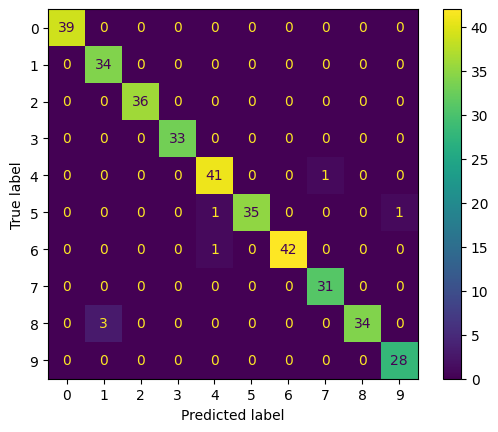

In [30]:
X_train, X_test, y_train, y_test=train_test_split(data.data, data.target, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape)
al=RandomForestClassifier()
al.fit(X_train, y_train)
y_pred=al.predict(X_test)
ConfusionMatrixDisplay.from_estimator(al, X_test, y_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))